In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve,classification_report
data=pd.read_csv('heart.csv')

In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
display(data.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,54.458396,0.691377,1.215582,131.630106,246.303328,0.148260,0.634644,149.223147,0.334342,1.067927,1.209531,0.736762,2.115734,0.502269
std,9.063917,0.462100,1.134938,17.565582,51.667130,0.355492,0.689783,22.983540,0.471938,1.172631,0.698739,1.011064,0.705388,0.500184
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1322 non-null   int64  
 1   sex       1322 non-null   int64  
 2   cp        1322 non-null   int64  
 3   trestbps  1322 non-null   int64  
 4   chol      1322 non-null   int64  
 5   fbs       1322 non-null   int64  
 6   restecg   1322 non-null   int64  
 7   thalach   1322 non-null   int64  
 8   exang     1322 non-null   int64  
 9   oldpeak   1322 non-null   float64
 10  slope     1322 non-null   int64  
 11  ca        1322 non-null   int64  
 12  thal      1322 non-null   int64  
 13  target    1322 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 144.7 KB


None

In [5]:
print(data['target'].value_counts())

target
1    664
0    658
Name: count, dtype: int64


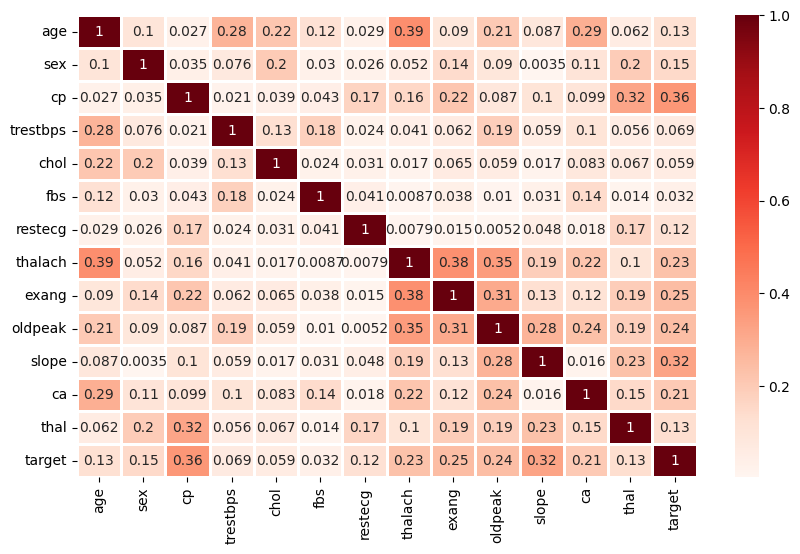

cp          0.362518
slope       0.324617
exang       0.246939
oldpeak     0.241871
thalach     0.232766
ca          0.205388
sex         0.150900
thal        0.134842
age         0.126630
restecg     0.124177
trestbps    0.068617
chol        0.059065
fbs         0.031695
Name: target, dtype: float64


In [6]:
new_df=data
plt.figure(figsize=(10,6))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Reds")
plt.show()

C=abs(corr["target"]).sort_values(ascending=False)[1:]
print(C)


In [7]:
Y = data['target']
X = data.drop('target',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

Accuracy: 0.7376948632762587
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       182
           1       0.75      0.77      0.76       215

    accuracy                           0.74       397
   macro avg       0.74      0.74      0.74       397
weighted avg       0.74      0.74      0.74       397



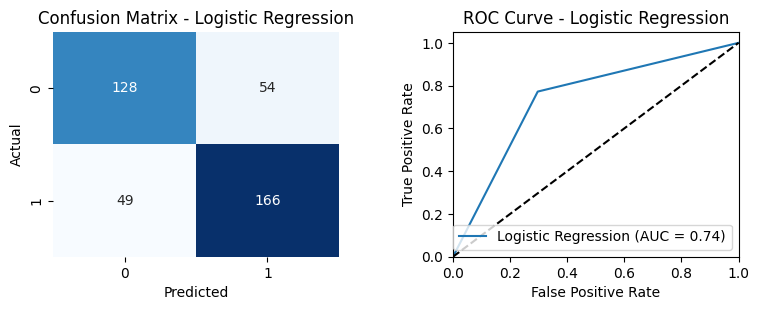

In [8]:
# Logistic Regression
LR_classifier = LogisticRegression(solver='lbfgs', max_iter=1500)
LR_classifier.fit(X_train, Y_train)
Y_pred_lr = LR_classifier.predict(X_test)
confusion_mat_lr = confusion_matrix(Y_test, Y_pred_lr)
roc_auc_lr = roc_auc_score(Y_test, Y_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, Y_pred_lr)
classification_rep = classification_report(Y_test,Y_pred_lr)

print("Accuracy:", roc_auc_lr)
print("Classification Report:\n",classification_rep)

plt.figure(figsize=(14,7)) 

plt.subplot(2, 3, 1)
sns.heatmap(confusion_mat_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

plt.subplot(2, 3, 2)
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


Accuracy: 0.618898543317148
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.61      0.60       182
           1       0.66      0.63      0.64       215

    accuracy                           0.62       397
   macro avg       0.62      0.62      0.62       397
weighted avg       0.62      0.62      0.62       397



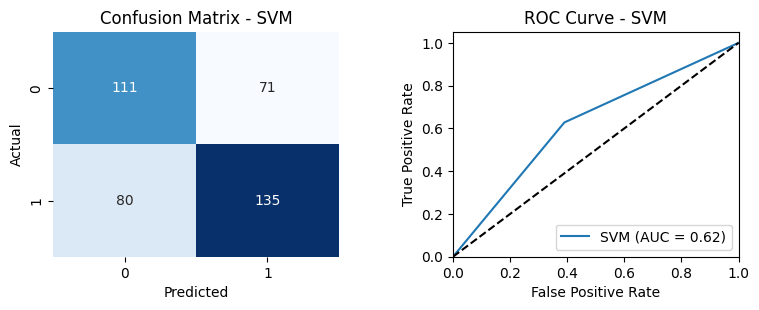

In [9]:
# SVM
clf_svm = svm.SVC()
clf_svm.fit(X_train, Y_train)
Y_pred_svm = clf_svm.predict(X_test)
confusion_mat_svm = confusion_matrix(Y_test, Y_pred_svm)
roc_auc_svm = roc_auc_score(Y_test, Y_pred_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, Y_pred_svm)
classification_rep = classification_report(Y_test,Y_pred_svm)

print("Accuracy:", roc_auc_svm)
print("Classification Report:\n",classification_rep)



plt.figure(figsize=(14,7)) 

plt.subplot(2, 3, 1)
sns.heatmap(confusion_mat_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')

plt.subplot(2, 3, 2)
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = {:.2f})".format(roc_auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Accuracy: 0.5019039100434449
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.99      0.63       182
           1       0.67      0.01      0.02       215

    accuracy                           0.46       397
   macro avg       0.56      0.50      0.32       397
weighted avg       0.57      0.46      0.30       397



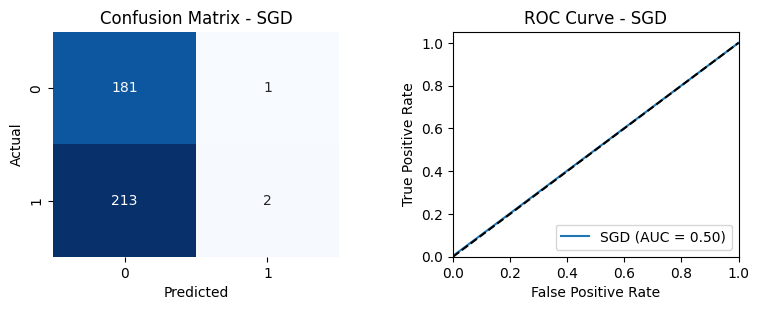

In [10]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred_sgd = sgd.predict(X_test)
confusion_mat_sgd = confusion_matrix(Y_test, Y_pred_sgd)
roc_auc_sgd = roc_auc_score(Y_test, Y_pred_sgd)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(Y_test, Y_pred_sgd)
classification_rep = classification_report(Y_test,Y_pred_sgd)

print("Accuracy:", roc_auc_sgd)
print("Classification Report:\n",classification_rep)

plt.figure(figsize=(14,7)) 

plt.subplot(2, 3, 1)
sns.heatmap(confusion_mat_sgd, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SGD')

plt.subplot(2, 3, 2)
plt.plot(fpr_sgd, tpr_sgd, label="SGD (AUC = {:.2f})".format(roc_auc_sgd))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SGD')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Accuracy: 0.8514183490927676
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       182
           1       0.84      0.91      0.87       215

    accuracy                           0.86       397
   macro avg       0.86      0.85      0.85       397
weighted avg       0.86      0.86      0.86       397



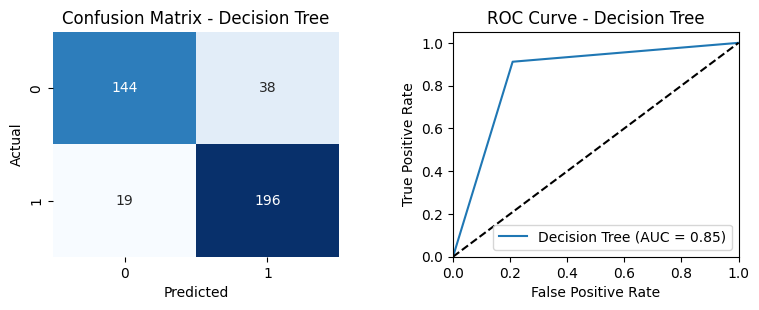

In [11]:
# Decision Tree
treee = tree.DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
treee.fit(X_train, Y_train)
Y_pred_tree = treee.predict(X_test)
confusion_mat_tree = confusion_matrix(Y_test, Y_pred_tree)
roc_auc_tree = roc_auc_score(Y_test, Y_pred_tree)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, Y_pred_tree)
classification_rep = classification_report(Y_test,Y_pred_tree)

print("Accuracy:", roc_auc_tree)
print("Classification Report:\n",classification_rep)

plt.figure(figsize=(14,7)) 

plt.subplot(2, 3, 1)
sns.heatmap(confusion_mat_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

plt.subplot(2, 3, 2)
plt.plot(fpr_tree, tpr_tree, label="Decision Tree (AUC = {:.2f})".format(roc_auc_tree))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Accuracy: 0.8602862254025045
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       182
           1       0.87      0.87      0.87       215

    accuracy                           0.86       397
   macro avg       0.86      0.86      0.86       397
weighted avg       0.86      0.86      0.86       397



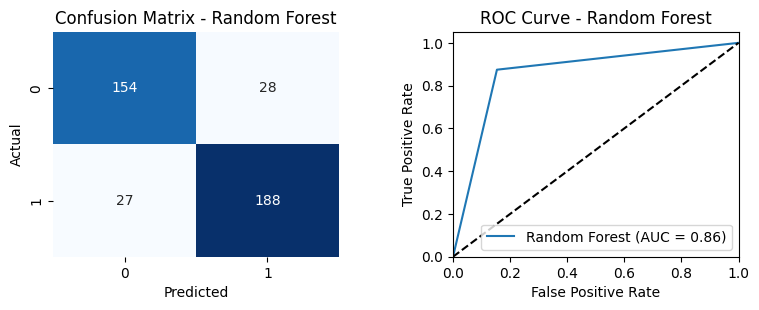

In [12]:
# Random Forest
forest = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=6)
forest.fit(X_train, Y_train)
Y_pred_forest = forest.predict(X_test)
confusion_mat_forest = confusion_matrix(Y_test, Y_pred_forest)
roc_auc_forest = roc_auc_score(Y_test, Y_pred_forest)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_test, Y_pred_forest)
classification_rep = classification_report(Y_test,Y_pred_forest)

print("Accuracy:", roc_auc_forest)
print("Classification Report:\n",classification_rep)

plt.figure(figsize=(14,7)) 

plt.subplot(2, 3, 1)
sns.heatmap(confusion_mat_forest, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

plt.subplot(2, 3, 2)
plt.plot(fpr_forest, tpr_forest, label="Random Forest (AUC = {:.2f})".format(roc_auc_forest))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [13]:
print("Accuracy (Logistic Regression):", accuracy_score(Y_test, Y_pred_lr))
print("Accuracy (SVM):", accuracy_score(Y_test, Y_pred_svm))
print("Accuracy (SGD):", accuracy_score(Y_test, Y_pred_sgd))
print("Accuracy (Decision Tree):", accuracy_score(Y_test, Y_pred_tree))
print("Accuracy (Random Forest):", accuracy_score(Y_test, Y_pred_forest))

Accuracy (Logistic Regression): 0.7405541561712846
Accuracy (SVM): 0.6196473551637279
Accuracy (SGD): 0.4609571788413098
Accuracy (Decision Tree): 0.8564231738035264
Accuracy (Random Forest): 0.8614609571788413
